In [3]:
pip install python-louvain


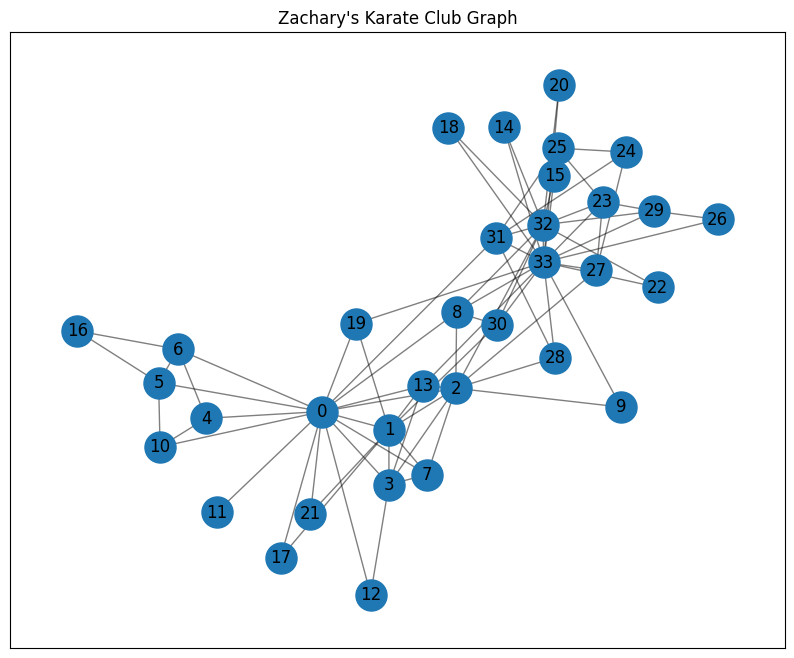

Number of nodes: 34
Number of edges: 78
Average degree: 4.59
Is the graph connected? True
Number of connected components: 1
Graph density: 0.14
Graph transitivity: 0.26
Detected 2 communities using Girvan-Newman method.


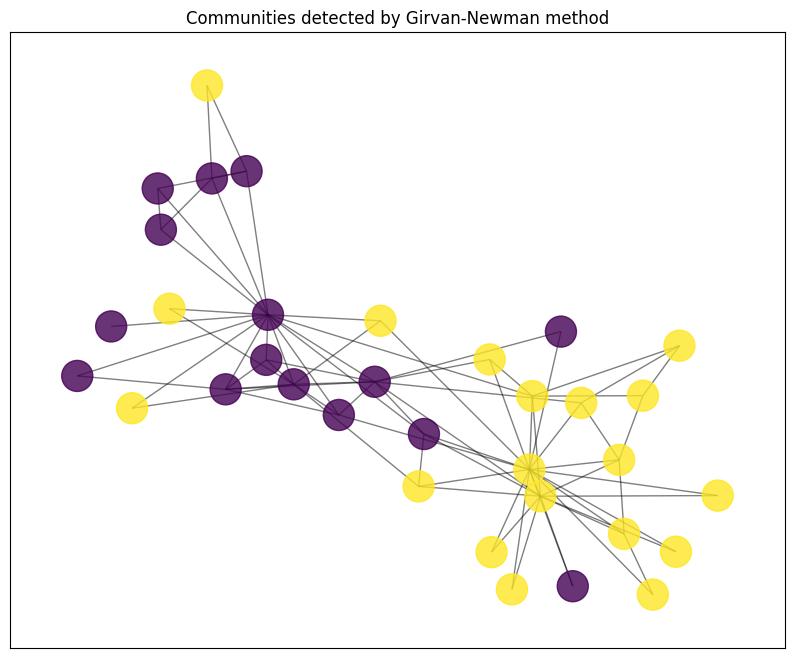

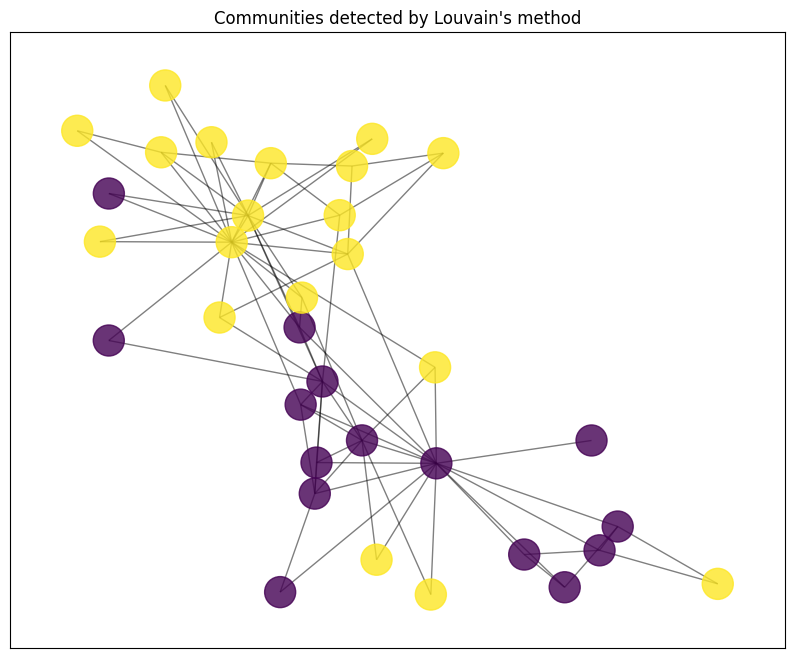

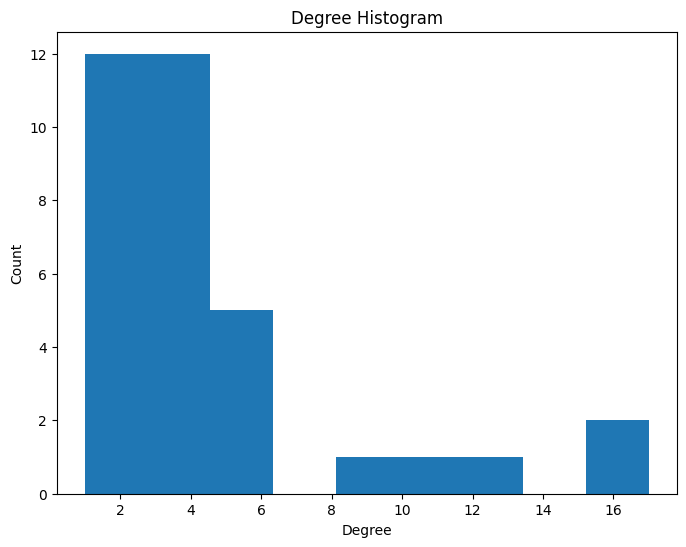

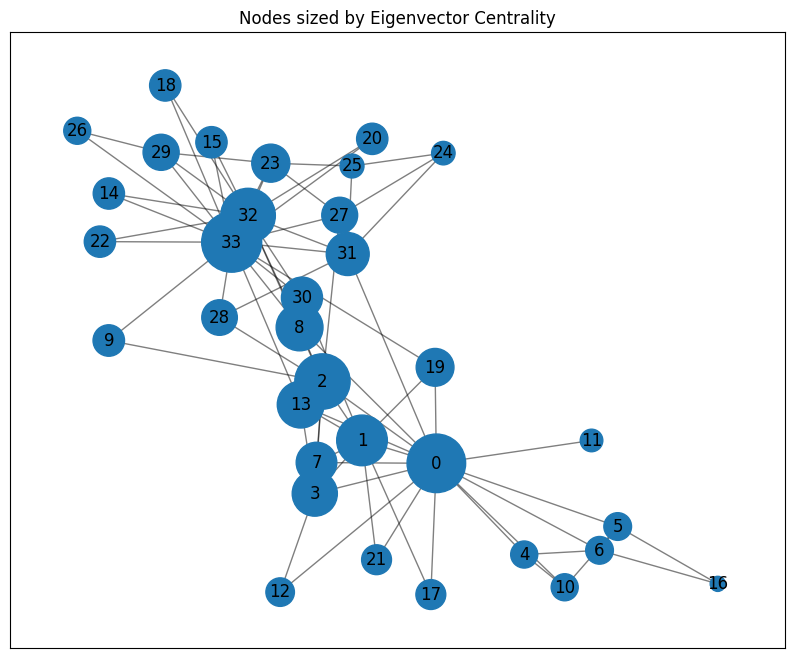

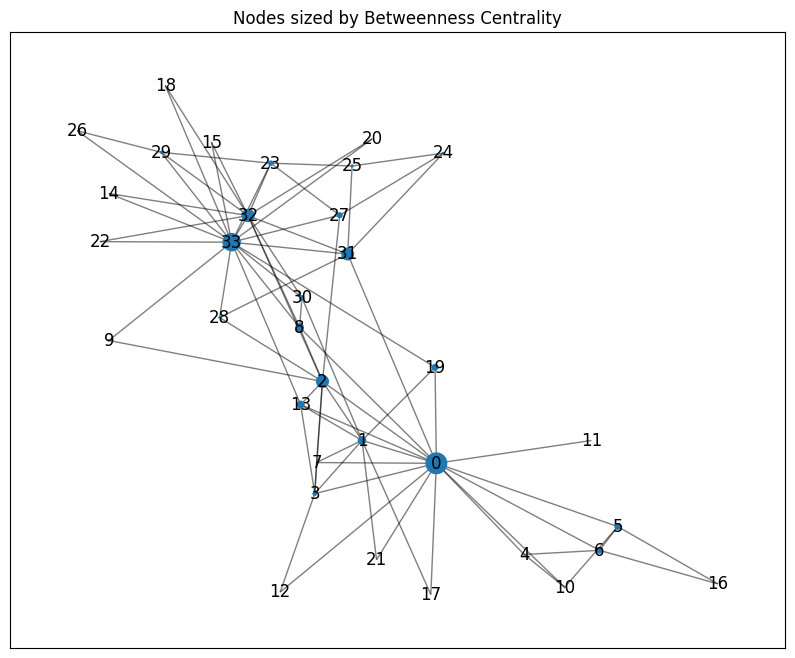

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the Karate Club graph
G = nx.karate_club_graph()

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Zachary's Karate Club Graph")
plt.show()

# Analyze the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")

import community as community_louvain

# EDA: Basic graph properties
print(f"Is the graph connected? {nx.is_connected(G)}")
print(f"Number of connected components: {nx.number_connected_components(G)}")
print(f"Graph density: {nx.density(G):.2f}")
print(f"Graph transitivity: {nx.transitivity(G):.2f}")

from networkx.algorithms import community

# Community Detection using Girvan-Newman method
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
partition = {node: i for i, community in enumerate(top_level_communities) for node in community}
print(f"Detected {max(partition.values()) + 1} communities using Girvan-Newman method.")

# Visualization: Graph with community coloring
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')
plt.title("Communities detected by Girvan-Newman method")
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=cmap, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


# Visualization 1: Graph with community coloring
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')
plt.title("Communities detected by Louvain's method")
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=cmap, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# Visualization 2: Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins='auto')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Visualization 3: Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in eigenvector_centrality.values()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Nodes sized by Eigenvector Centrality")
plt.show()

# Visualization 4: Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=[v * 500 for v in betweenness_centrality.values()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Nodes sized by Betweenness Centrality")
plt.show()

# Note: For a simple dataset like this, building ML models might not be very meaningful.
# More advanced tasks can be done on larger and more complex graph datasets.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Extracting features for nodes
def extract_features(G, nodes):
    features = []
    for node in nodes:
        neighbors = list(G.neighbors(node))
        avg_neighbor_degree = sum([G.degree(n) for n in neighbors]) / len(neighbors) if neighbors else 0
        features.append([G.degree(node), nx.clustering(G, node), avg_neighbor_degree])
    return features

# Feature extraction
nodes = list(G.nodes())
X = extract_features(G, nodes)
y = [partition[node] for node in nodes]

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 54.55%
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.67      0.57      0.62         7

    accuracy                           0.55        11
   macro avg       0.53      0.54      0.53        11
weighted avg       0.57      0.55      0.55        11

